In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
import os
from functools import reduce
from scipy.stats import chisquare

pd.set_option('display.max_columns', 500)

In [2]:
data_path = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop/fpl/data') 
idlist_file ='/player_idlist.csv'
gws_path = '/gws/'
players_path = '/players/'

In [3]:
idlist = pd.read_csv(data_path + '/2018-19/' + idlist_file)

cleaned_players = pd.read_csv(data_path + '/2018-19/' + 'cleaned_players.csv')
cleaned_players['fullname'] = cleaned_players['first_name'] + cleaned_players['second_name']
idlist.rename(columns={'id':'player_id'}, inplace=True)
cleaned_players.rename(columns={'id':'player_id'}, inplace=True)
element_types = pd.read_csv(data_path + '/2018-19/' + 'element_types_raw.csv')
teams = pd.read_csv(data_path + '/2018-19/' + 'teams_raw.csv')

In [4]:
def swap_columns(players):
    gws = players.gw
    elements = players.element
    
    players.drop(columns=['gw', 'element'], axis=1, inplace=True)
    players = pd.concat([gws, elements, players], axis=1)
    
    return players

In [5]:
players = pd.DataFrame()

for index, row in idlist.iterrows():
    first_name = row['first_name']
    second_name = row['second_name']
    play_id = str(row['player_id'])
    
    player_path = '/' + first_name + '_' + second_name + '_' + play_id + '/'
    
    player = pd.read_csv(data_path + '/2018-19/' + players_path + player_path + 'gw.csv')
    player['gw'] = np.arange(player.shape[0]) + 1
    players = pd.concat([players, player], axis=0)

In [6]:
players = swap_columns(players)

players.rename(columns={'element' : 'player_id',
                        'total_points' : 'points'}, inplace=True)

players['value'] = players['value'] / 10
players['roi'] = players['points'] / players['value']

players.reset_index(drop=True, inplace=True)

In [7]:
players.shape

(10393, 56)

In [8]:
players.head()

,gw,player_id,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,roi
0,1,1,0,42,0,0,0,24,0,2,31,0.0,0,0,0,0,1,0,2,0,4.7,1,47.0,0,2018-08-12T15:00:00Z,12 Aug 16:00,0,0,90,0,0,13,0,0,0,0,9,0,1,6,70767,0,0,0,2.0,0.0,0.0,3,0,0,0,5.0,True,0,0,0.6
1,2,1,0,35,0,0,0,26,0,1,25,0.0,0,0,0,0,14,0,3,0,5.3,526,53.0,0,2018-08-18T16:30:00Z,18 Aug 17:30,0,0,90,0,0,6,0,0,0,0,8,0,2,8,90038,0,0,0,2.0,3.0,0.0,3,188,6059,5871,5.0,False,0,0,0.6
2,3,1,0,24,0,0,0,17,0,0,20,0.0,0,0,0,0,21,0,1,0,2.8,1053,27.8,0,2018-08-25T14:00:00Z,25 Aug 15:00,0,0,90,0,0,19,0,0,0,0,10,0,3,4,107301,0,0,0,1.0,3.0,0.0,3,8540,19550,11010,5.0,True,0,0,0.6
3,4,1,0,38,0,0,0,8,0,0,24,0.0,0,0,0,2,33,0,2,0,0.2,1584,2.4,0,2018-09-02T12:30:00Z,02 Sep 13:30,0,0,90,0,0,5,0,0,0,0,8,0,4,1,123566,0,0,0,3.0,2.0,0.0,1,9582,19332,9750,5.0,False,0,0,0.2
4,5,1,0,33,0,0,0,13,0,2,23,0.0,0,0,0,0,46,0,1,0,1.4,2121,14.2,0,2018-09-15T14:00:00Z,15 Sep 15:00,0,0,90,0,0,15,0,0,0,0,13,0,5,1,123310,0,0,0,2.0,1.0,0.0,2,-3297,8837,12134,5.0,False,0,0,0.4


In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 56 columns):
gw                                 10393 non-null int64
player_id                          10393 non-null int64
assists                            10393 non-null int64
attempted_passes                   10393 non-null int64
big_chances_created                10393 non-null int64
big_chances_missed                 10393 non-null int64
bonus                              10393 non-null int64
bps                                10393 non-null int64
clean_sheets                       10393 non-null int64
clearances_blocks_interceptions    10393 non-null int64
completed_passes                   10393 non-null int64
creativity                         10393 non-null float64
dribbles                           10393 non-null int64
ea_index                           10393 non-null int64
errors_leading_to_goal             10393 non-null int64
errors_leading_to_goal_attempt     10393 non-null

In [10]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%d' % int(height),
                ha='center', va='bottom')

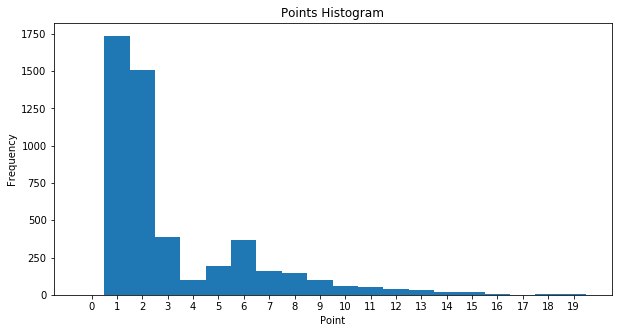

In [11]:
scored_players = players.loc[players['points'] > 0, :]

max_point = scored_players['points'].max()
bins = bins=np.arange(0, max_point, 1)

plt.figure(figsize=(10, 5))
plt.hist(scored_players['points'], bins=bins, align='left')
plt.xticks(bins[:-1])
plt.title("Points Histogram")
plt.ylabel("Frequency")
plt.xlabel("Point")
plt.show()

<span style='color:green'>Most of the players will have points around 1-2 points per week</span>

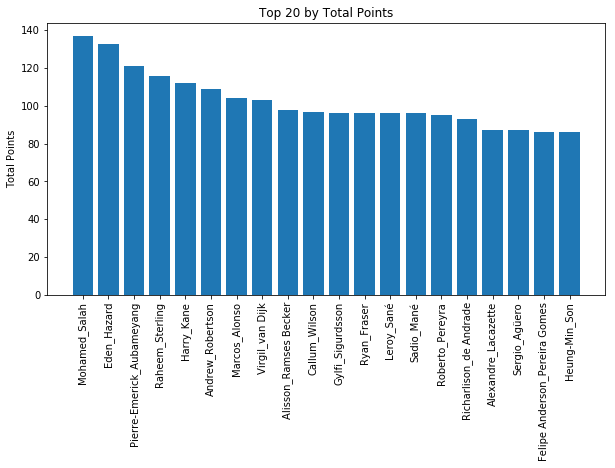

In [12]:
top_10 = players.groupby(players.player_id, as_index=False)['points'].sum().sort_values('points', ascending =False)[:20]

top_10 = pd.merge(top_10, idlist, left_on='player_id', right_on='player_id', how='inner')
top_10['full_name'] = top_10['first_name'] + '_' + top_10['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_10['full_name'], top_10['points'])
plt.xticks(rotation=90)
plt.ylabel('Total Points')
plt.title('Top 20 by Total Points')
plt.show()

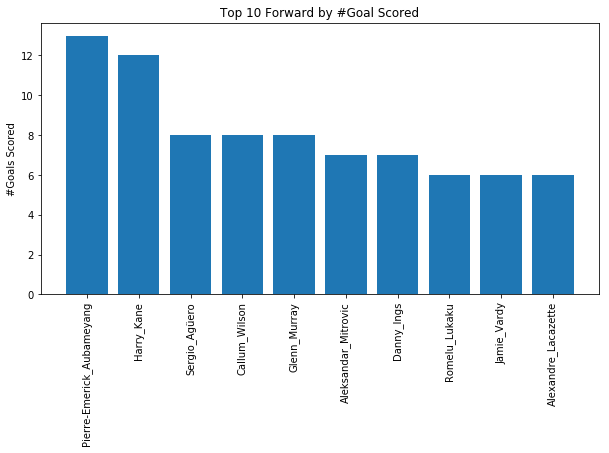

In [13]:
df = players.merge(cleaned_players.loc[:, ['player_id', 'element_type']], on='player_id')
top_scorer = df.loc[df['element_type'] == 4,:].groupby('player_id', as_index=False)['goals_scored'].sum().sort_values('goals_scored', ascending=False)[:10]
top_scorer = top_scorer.merge(cleaned_players.loc[:, ['player_id', 'first_name', 'second_name']])
top_scorer['full_name'] = top_scorer['first_name'] + '_' + top_scorer['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_scorer['full_name'], top_scorer['goals_scored'])
plt.ylabel('#Goals Scored')
plt.xticks(rotation=90)
plt.title('Top 10 Forward by #Goal Scored')
plt.show()


<span style='color:green'>Even Lukaku can made it on top 10,  C'mon
   he's not that bad</span>

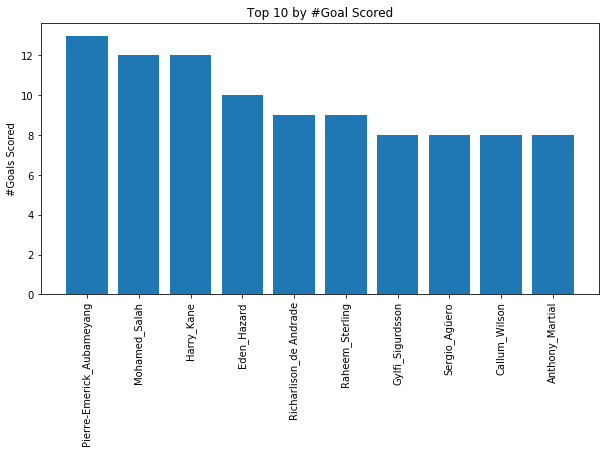

In [14]:
df = players.groupby('player_id', as_index=False)['goals_scored'].sum().sort_values('goals_scored', ascending=False)[:10]
df = pd.merge(df, cleaned_players.loc[:, ['player_id', 'first_name', 'second_name']], on='player_id', how='inner')
df['full_name'] = df['first_name'] + '_' + df['second_name']

plt.figure(figsize=(10, 5))
plt.bar(df['full_name'], df['goals_scored'])
plt.ylabel('#Goals Scored')
plt.xticks(rotation=90)
plt.title('Top 10 by #Goal Scored')
plt.show()


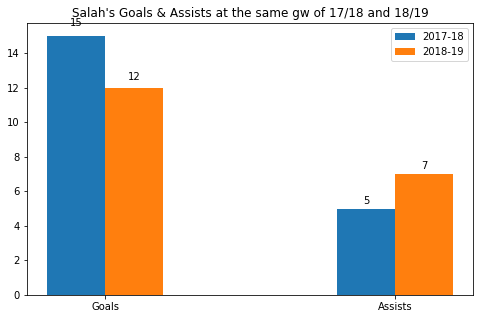

In [15]:
salah_prev = pd.read_csv(data_path + '/2017-18/' + 'players/' + 'Mohamed_Salah/gw.csv')
salah_now = players.loc[players['player_id'] == 253, :]
salah_prev_until_this_gw = salah_prev.loc[:salah_now.shape[0]-1, :]

now_goals = salah_now['goals_scored'].sum() 
now_assists =  salah_now['assists'].sum()
prev_goals = salah_prev_until_this_gw['goals_scored'].sum() 
prev_assists = salah_prev_until_this_gw['assists'].sum()

n = 2 
ind = np.arange(n)
width = 0.20

fig, ax = plt.subplots()
fig.set_size_inches(h=5, w=8)
rect_prev = ax.bar(ind, [prev_goals, prev_assists], width, label='2017-18')
rect_now = ax.bar(ind+width, [now_goals, now_assists], width, label='2018-19')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("Goals", "Assists"))
ax.set_title("Salah's Goals & Assists at the same gw of 17/18 and 18/19")
plt.legend()

autolabel(rect_prev)
autolabel(rect_now)
plt.show()

<span style='color:green'>Mo Salah is absolutly not a ONE YEAR WONDER</span>

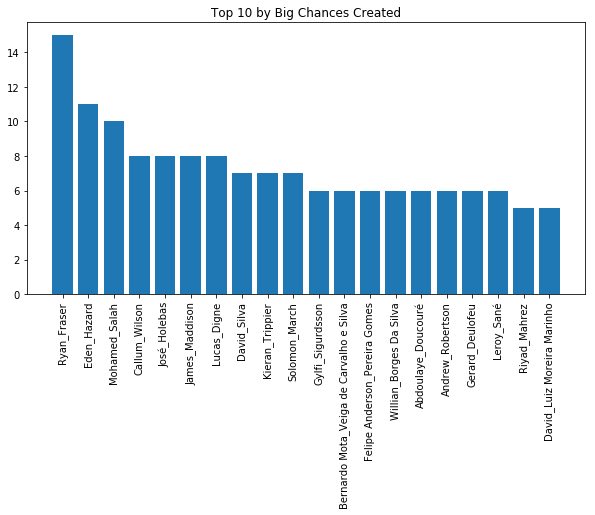

In [16]:
top_10 = players.groupby('player_id', as_index=False)['big_chances_created'].sum().sort_values('big_chances_created', ascending=False)[:20]
top_10 = top_10.merge(cleaned_players.loc[:, ('player_id', 'first_name', 'second_name')], on='player_id')
top_10['fullname'] = top_10['first_name'] + '_' + top_10['second_name']

plt.figure(figsize=(10, 5))
plt.bar(top_10['fullname'], top_10['big_chances_created'])
plt.xticks(rotation=90)
plt.title("Top 10 by Big Chances Created")
plt.show()


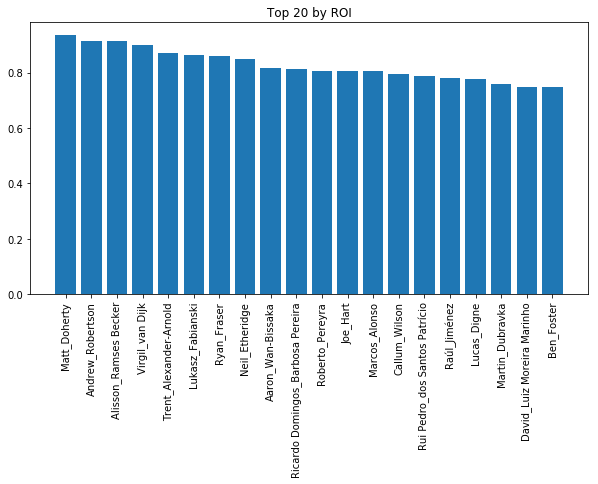

In [17]:
top_by_roi = players.groupby('player_id', as_index=False)['roi'].mean()
top_by_roi = top_by_roi.merge(cleaned_players.loc[:,('player_id', 'team', 'element_type', 'first_name', 'second_name')], on='player_id')
top_by_roi = top_by_roi.merge(teams.loc[:, ('id', 'name')], left_on='team', right_on='id')
top_by_roi.drop(columns=['team','id'], inplace=True)
top_by_roi['fullname'] = top_by_roi['first_name'] + '_' + top_by_roi['second_name']
top_by_roi.drop(columns=['first_name', 'second_name'], inplace=True)
top_by_roi.rename(columns={'name': 'team'}, inplace=True)

top_by_roi = pd.merge(top_by_roi, element_types.loc[:, ('id', 'singular_name_short')], left_on='element_type', right_on='id', how='inner')
top_by_roi.drop(columns=['id', 'element_type'], inplace=True)
top_by_roi.rename(columns={'singular_name_short':'position'}, inplace=True)

top_by_roi.sort_values('roi', ascending=False, inplace=True)

top_20_roi = top_by_roi[:20]

plt.figure(figsize=(10, 5))
plt.bar(top_20_roi['fullname'], top_20_roi['roi'])
plt.xticks(rotation=90)
plt.title('Top 20 by ROI')
plt.show()


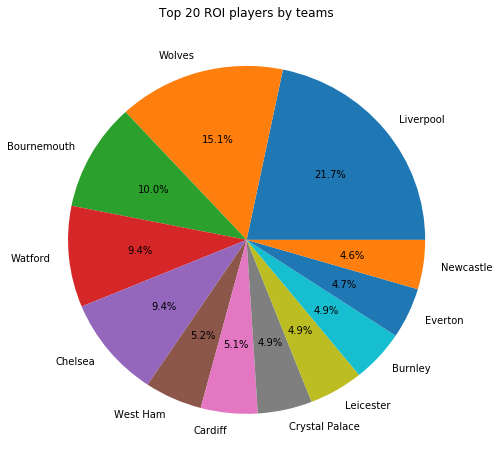

In [18]:
top_team_roi = top_20_roi.groupby('team', as_index=False)['roi'].sum().sort_values('roi', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(top_team_roi['roi'], labels=top_team_roi['team'], autopct='%1.1f%%')
plt.title("Top 20 ROI players by teams")
plt.show()

<span style='color:green'>You should invest more in Wolves, Bournewmouth and Watford</span>

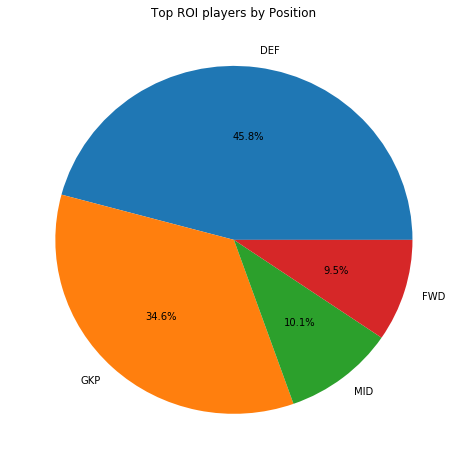

In [19]:
df = top_20_roi.groupby('position', as_index=False)['roi'].sum().sort_values('roi', ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df['roi'], labels=df['position'], autopct='%1.1f%%')
plt.title('Top ROI players by Position')
plt.show()


<span style='color:green'>You should invest more in DEF and GK</span>

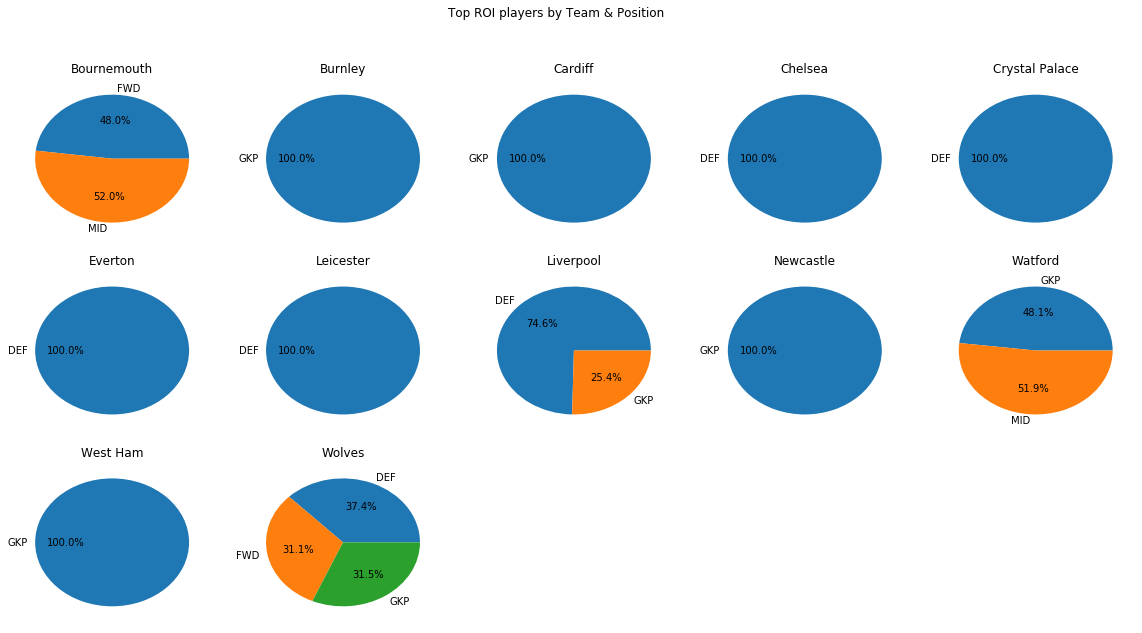

In [20]:
top_roi_teams = list(top_20_roi.groupby('team').groups.keys())

n_col = 5
n_row = int(np.ceil(len(top_roi_teams) / n_col))

plt.figure(figsize=(20, 10))
for index, team in enumerate(top_roi_teams):
    top_20_roi_by_team = top_20_roi.loc[top_20_roi['team'] == team, :]
    top_20_roi_by_team_by_position = top_20_roi_by_team.groupby('position', as_index=False)['roi'].sum()
    top_20_roi_by_team_by_position['roi'] = top_20_roi_by_team_by_position['roi'] *100
    
    plt.subplot(n_row, n_col, index+1)
    plt.pie(top_20_roi_by_team_by_position['roi'], labels=top_20_roi_by_team_by_position['position'], autopct='%1.1f%%')
    plt.gca().set_title(team)
        
plt.gcf().suptitle("Top ROI players by Team & Position")
plt.show()


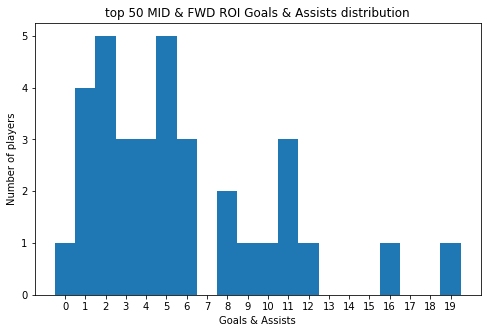

In [21]:
df = top_by_roi[:50].copy()
df = df.loc[df['position'] != 'GKP', :]
for player_id in df['player_id']:
    player = players.loc[players['player_id'] == player_id,:]
    goals_assists = player['goals_scored'].sum() + player['assists'].sum()
    df.loc[df['player_id'] == player_id,'goals_assists'] = goals_assists
    
bins = np.arange(df['goals_assists'].min(), df['goals_assists'].max() + 2, 1)

plt.figure(figsize=(8, 5))
plt.hist(df['goals_assists'], bins=bins, align='left')
plt.xticks(bins[:-1])
plt.title("top 50 MID & FWD ROI Goals & Assists distribution")
plt.xlabel("Goals & Assists")
plt.ylabel("Number of players")
plt.show()

<span style='color:green'>It seems like there are someone who neither score nor assist, how can he made on the top ROI list? </span>

In [22]:
df.loc[df['goals_assists'] == 0, :]

,player_id,roi,team,fullname,position,goals_assists
129,143,0.657787,Crystal Palace,Mamadou_Sakho,DEF,0.0


<span style='color:green'>The guy is Mamadou Sakho, former Liverpool player</span><br>
<span style='color:green'>Let's investigate on his stats</span>

In [23]:
sakho = players.loc[players['player_id'] == 143, :]
print("Sakho Performances after {0} GWs ".format(sakho.shape[0]))
print("Goals: ", sakho['goals_scored'].sum())
print("Assists: ", sakho['assists'].sum())
print("Clean Sheet: ", sakho['clean_sheets'].sum())
print("Cost mean: ", sakho['value'].mean())
print("Total Points: ", sakho['points'].sum())

Sakho Performances after 19 GWs 
Goals:  0
Assists:  0
Clean Sheet:  7
Cost mean:  4.968421052631581
Total Points:  62


/Users/80151/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


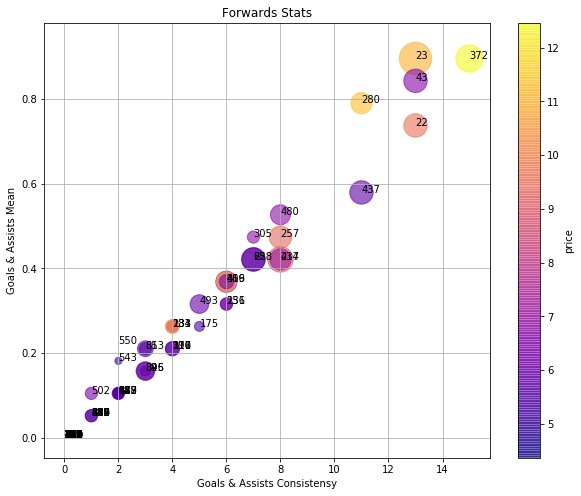

In [24]:
def consistency(events):
    return sum(events != 0)

def chisquare_score(observations, expectaions=None):
    return chisquare(observations, expectaions)[0]

base_aggregations = [np.sum, np.mean]

forwardids = list(cleaned_players.loc[cleaned_players['element_type'] == 4, 'player_id'])
forwards = players.loc[[ player_id in forwardids for player_id in players['player_id']], :]

fw_stats_by_player_id = forwards.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'goals_scored': base_aggregations + [consistency, chisquare_score],
    'assists': base_aggregations + [consistency, chisquare_score],
    'roi' : np.mean,
    'value' : np.mean,
    'target_missed' : np.sum,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
    'offside' : base_aggregations,
    'penalties_missed' : np.sum
})

plt.figure(figsize=(10, 8))

x = fw_stats_by_player_id['goals_scored']['consistency'] + fw_stats_by_player_id['assists']['consistency']
y = fw_stats_by_player_id['goals_scored']['mean'] +  fw_stats_by_player_id['assists']['mean'] 
colors = fw_stats_by_player_id['value']['mean']
sizes = fw_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 50, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Goals & Assists Consistensy")
plt.ylabel("Goals & Assists Mean")
cbar.ax.set_ylabel("price")
plt.title("Forwards Stats")
plt.grid(True)
for index, row in fw_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
plt.show()

### The False 9

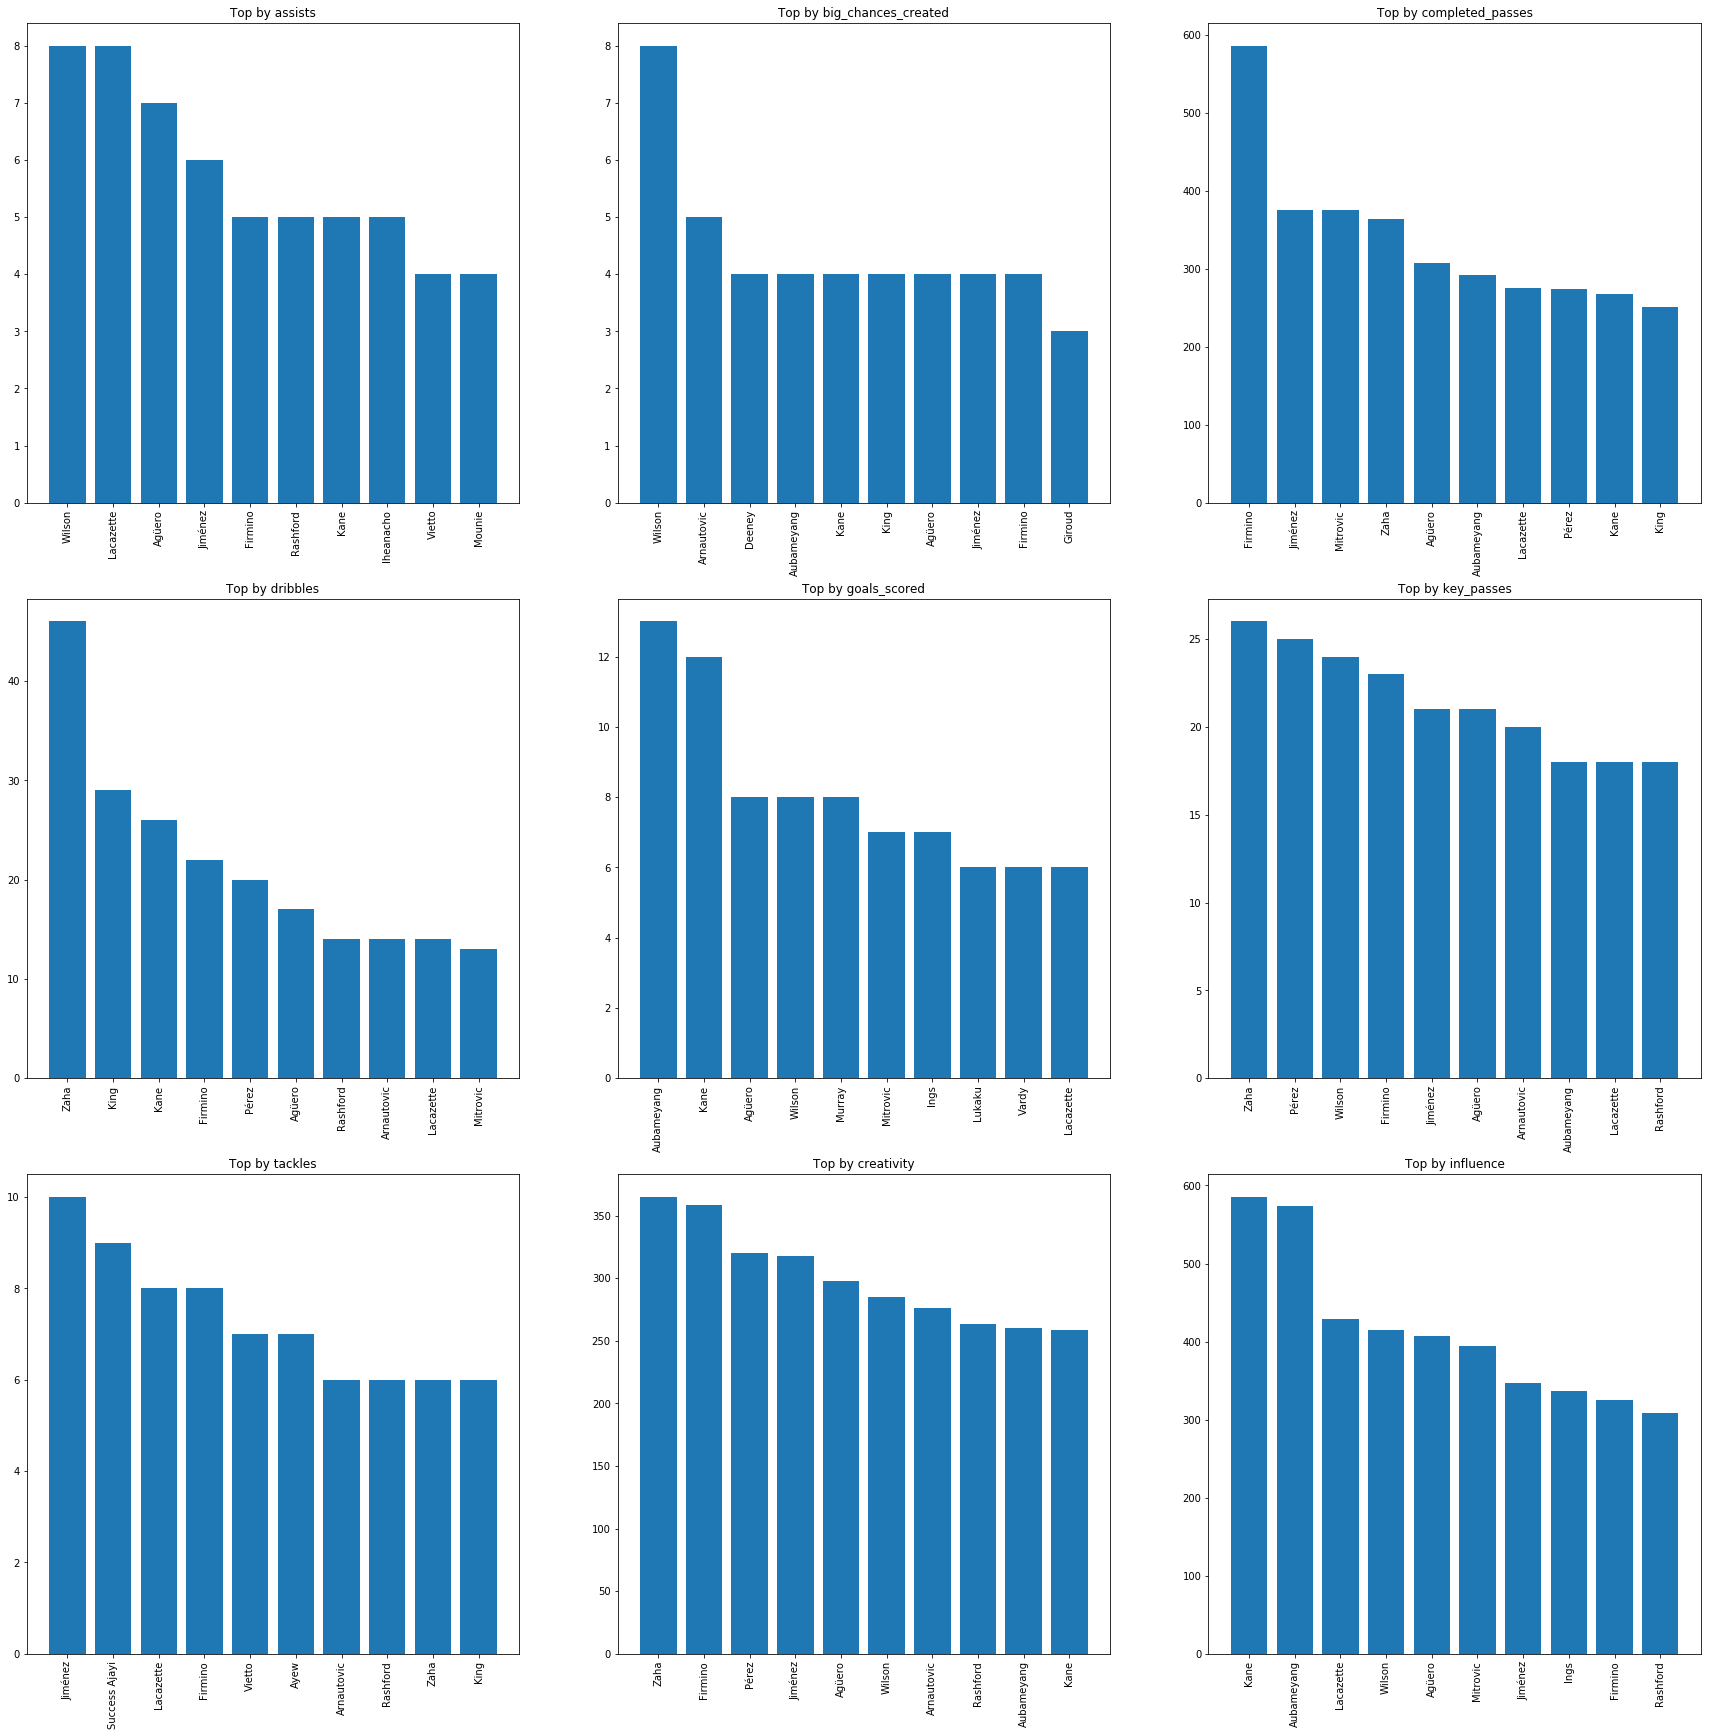

In [25]:
false_9_stats = forwards.groupby('player_id', as_index=False).agg({
    'assists': np.sum,
    'big_chances_created' : np.sum,
    'completed_passes' : np.sum,
    'dribbles' : np.sum,
    'goals_scored' : np.sum,
    'key_passes' : np.sum,
    'tackles' : np.sum,
    'creativity' : np.sum,
    'influence' : np.sum
})
false_9_stats = false_9_stats.merge(cleaned_players.loc[:, ['player_id','second_name']], on='player_id')

plt.figure(figsize=(30, 30))
for index, column in enumerate(false_9_stats.columns):
    if(column != 'player_id' and column != 'second_name'):
        top = false_9_stats.loc[:, ['second_name', column]].sort_values(column, ascending=False)[:10]
        plt.subplot(3, 3, index)
        plt.bar(top['second_name'], top[column])
        plt.xticks(rotation=90)
        plt.title('Top by {0}'.format(column))

plt.show()
        

/Users/80151/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


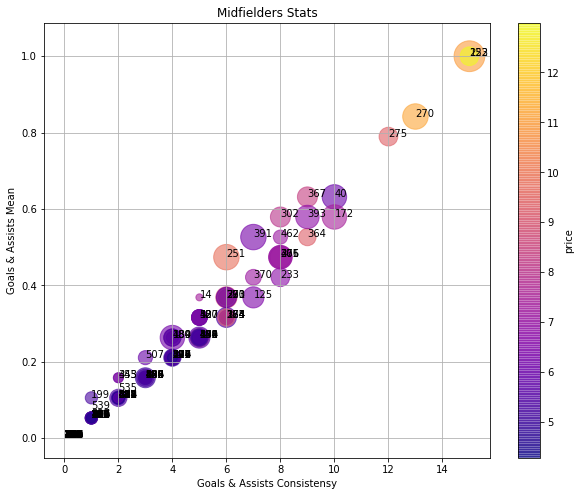

In [26]:
midfielderids = list(cleaned_players.loc[cleaned_players['element_type'] == 3, 'player_id'])
midfielders = players.loc[[ player_id in midfielderids for player_id in players['player_id']], :]

mid_stats_by_player_id = midfielders.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'goals_scored': base_aggregations + [consistency, chisquare_score],
    'assists': base_aggregations + [consistency, chisquare_score],
    'roi' : np.mean,
    'value' : np.mean,
    'target_missed' : np.sum,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
    'penalties_missed' : np.sum
})

plt.figure(figsize=(10, 8))

x = mid_stats_by_player_id['goals_scored']['consistency'] + mid_stats_by_player_id['assists']['consistency']
y = mid_stats_by_player_id['goals_scored']['mean'] +  mid_stats_by_player_id['assists']['mean'] 
colors = mid_stats_by_player_id['value']['mean']
sizes = mid_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 50, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Goals & Assists Consistensy")
plt.ylabel("Goals & Assists Mean")
cbar.ax.set_ylabel("price")
plt.grid(True)
plt.title("Midfielders Stats")
for index, row in mid_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
plt.show()

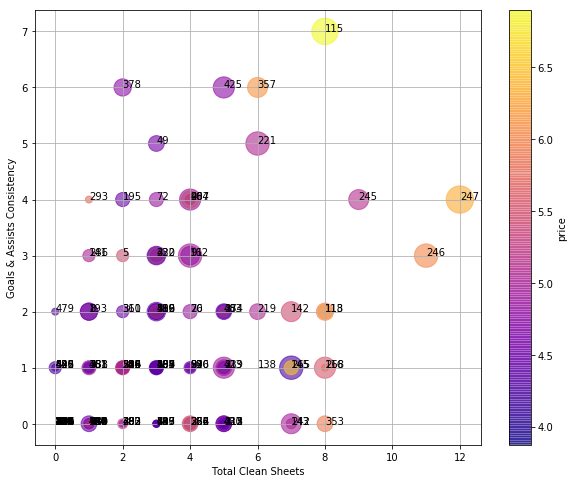

In [27]:
defenderids = list(cleaned_players.loc[cleaned_players['element_type'] == 2, 'player_id'])
defenders = players.loc[[ player_id in defenderids for player_id in players['player_id']], :]

def_stats_by_player_id = defenders.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'clean_sheets' : np.sum,
    'goals_scored': base_aggregations + [consistency],
    'assists': base_aggregations + [consistency],
    'roi' : np.mean,
    'value' : np.mean,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
})

plt.figure(figsize=(10, 8))

x = def_stats_by_player_id['clean_sheets']['sum']
y = def_stats_by_player_id['goals_scored']['consistency'] +  def_stats_by_player_id['assists']['consistency'] 
colors = def_stats_by_player_id['value']['mean']
sizes = def_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 50, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Total Clean Sheets")
plt.ylabel("Goals & Assists Consistency")
cbar.ax.set_ylabel("price")
plt.grid(True)

for index, row in def_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
    
plt.show()

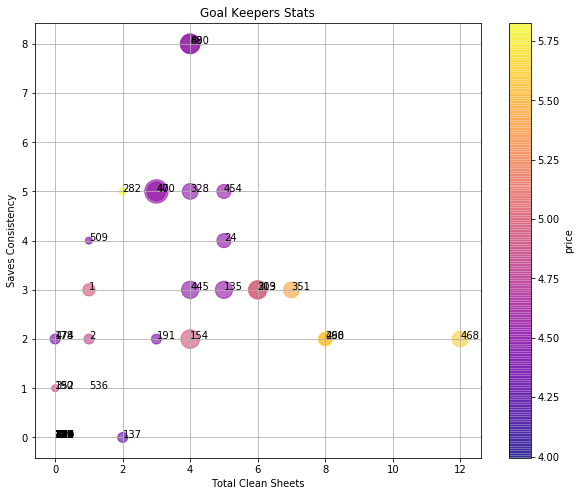

In [28]:
def save_consistensy(saves):
    return sum(saves > 4)
goalkeeperids = list(cleaned_players.loc[cleaned_players['element_type'] == 1, 'player_id'])
goalkeepers = players.loc[[ player_id in goalkeeperids for player_id in players['player_id']], :]

gk_stats_by_player_id = goalkeepers.groupby('player_id', as_index=False).agg({
    'points': base_aggregations,
    'bonus' : base_aggregations,
    'clean_sheets' : np.sum,
    'saves' : base_aggregations + [save_consistensy],
    'roi' : np.mean,
    'value' : np.mean,
    'dribbles' : np.sum,
    'minutes' : base_aggregations,
})

plt.figure(figsize=(10, 8))

x = gk_stats_by_player_id['clean_sheets']['sum']
y = gk_stats_by_player_id['saves']['save_consistensy']
colors = gk_stats_by_player_id['value']['mean']
sizes = gk_stats_by_player_id['bonus']['sum']

plt.scatter(x, y, c=colors, cmap='plasma', s=sizes * 50, alpha=0.6)
cbar = plt.colorbar()
plt.xlabel("Total Clean Sheets")
plt.ylabel("Saves Consistency")
cbar.ax.set_ylabel("price")
plt.title("Goal Keepers Stats")
plt.grid(True)

for index, row in gk_stats_by_player_id.iterrows():
    plt.gca().annotate(str(int(row['player_id'])), (x[index], y[index]))
    
plt.show()

In [29]:
idlist.loc[idlist['player_id'] == 391, :]

,first_name,second_name,player_id
495,Roberto,Pereyra,391
